In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

## a) Create points in unit ball with different dimensions

In [15]:
def create_point_unit_ball(dim: int):
    x = np.random.normal(0, 1, dim)
    x_norm = np.linalg.norm(x)
    x = x / x_norm

    a = np.random.uniform(0, 1)
    rho = np.power(a, 1/dim)
    y = rho * x
    return y

In [16]:
def create_points_unit_ball(n: int, dim: int):
    return [create_point_unit_ball(dim) for _ in range(n)]

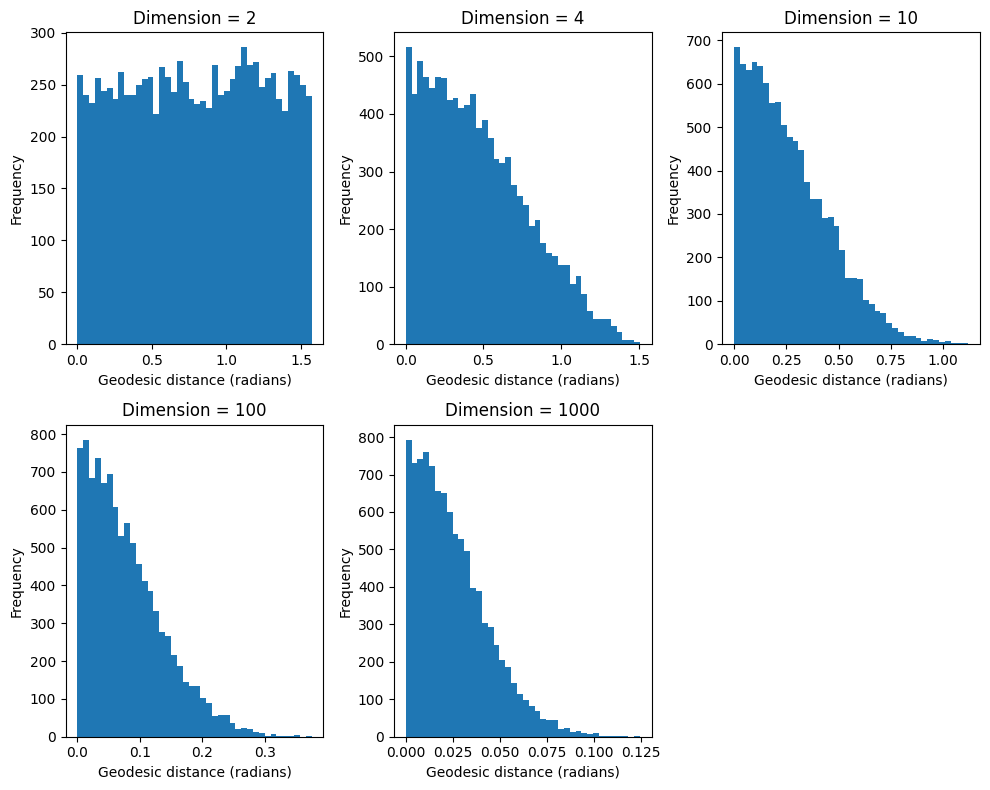

In [17]:
def geodesic_distance_to_equator(points):
    pts = np.asarray(points)
    single = (pts.ndim == 1)
    if single:
        pts = pts[np.newaxis, :]

    norms = np.linalg.norm(pts, axis=1)
    zero_mask = (norms == 0.0)
    ratio = np.zeros_like(norms)
    nonzero = ~zero_mask
    ratio[nonzero] = np.abs(pts[nonzero, -1]) / norms[nonzero]

    dists = np.arcsin(ratio)
    dists[zero_mask] = np.nan

    return dists[0] if single else dists


dims = [2, 4, 10, 100, 1000]
result_distance_to_eq = {}
n_points = 10_000

plt.figure(figsize=(10, 8))

for i, dim in enumerate(dims, 1):
    points = create_points_unit_ball(n_points, dim)
    distances = geodesic_distance_to_equator(points)

    plt.subplot(2, 3, i)
    plt.hist(distances, bins=40)
    plt.title(f"Dimension = {dim}")
    plt.xlabel("Geodesic distance (radians)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## b) Geodesic Distances to Equator and a Random Hyperplane

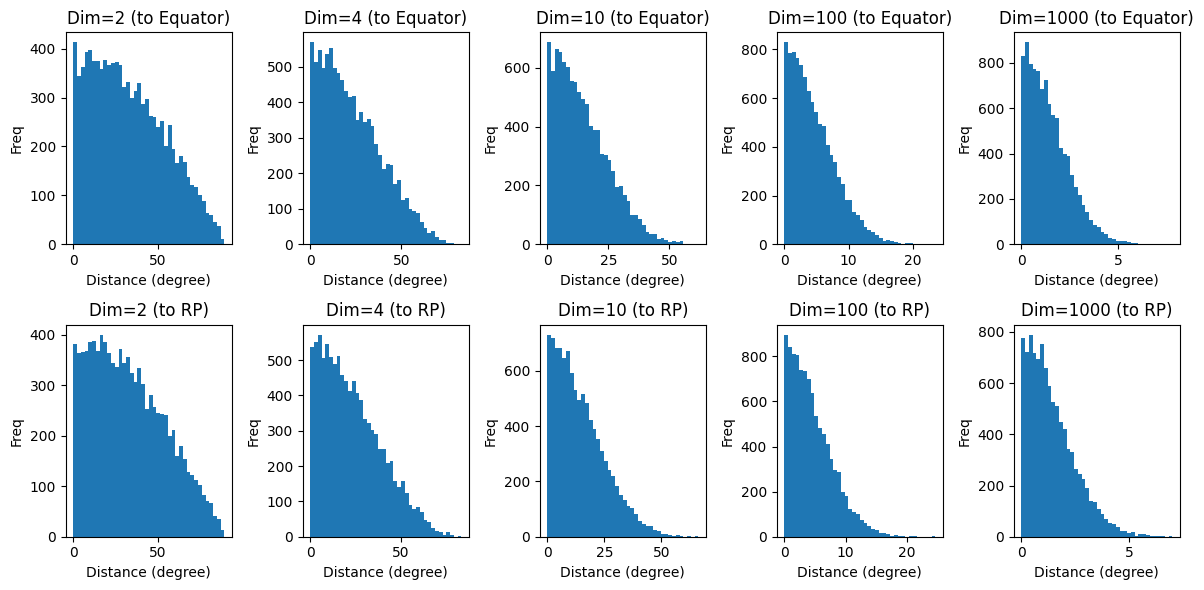

In [18]:
def geodesic_dist_to_equator(points):
    pts = np.asarray(points)
    norms = np.linalg.norm(pts, axis=1)
    ratio = np.abs(pts[:, -1]) / norms
    theta = np.arcsin(ratio)
    theta_deg = np.degrees(theta)
    return theta_deg

def geodesic_dist_to_random_plane(points):
    pts = np.asarray(points)
    n = pts.shape[1]
    normal = np.random.normal(0, 1, n)
    normal = normal / np.linalg.norm(normal)

    norms = np.linalg.norm(pts, axis=1)
    unit_pts = pts / norms[:, None]
    ratio = np.abs(unit_pts @ normal)
    theta = np.arcsin(ratio)
    theta_deg = np.degrees(theta)
    return theta_deg


dims = [2, 4, 10, 100, 1000]
n_points = 10_000

plt.figure(figsize=(12, 6))

for col, d in enumerate(dims, start=1):

    points = create_points_unit_ball(n_points, d + 1)
    dist_eq = geodesic_dist_to_equator(points)
    dist_rand = geodesic_dist_to_random_plane(points)

    plt.subplot(2, len(dims), col)
    plt.hist(dist_eq, bins=40)
    plt.title(f"Dim={d} (to Equator)")
    plt.xlabel("Distance (degree)")
    plt.ylabel("Freq")

    plt.subplot(2, len(dims), col + len(dims))
    plt.hist(dist_rand, bins=40)
    plt.title(f"Dim={d} (to RP)")
    plt.xlabel("Distance (degree)")
    plt.ylabel("Freq")

plt.tight_layout()
plt.show()

## c) Angle Behavior of Random Points on Unit Ball

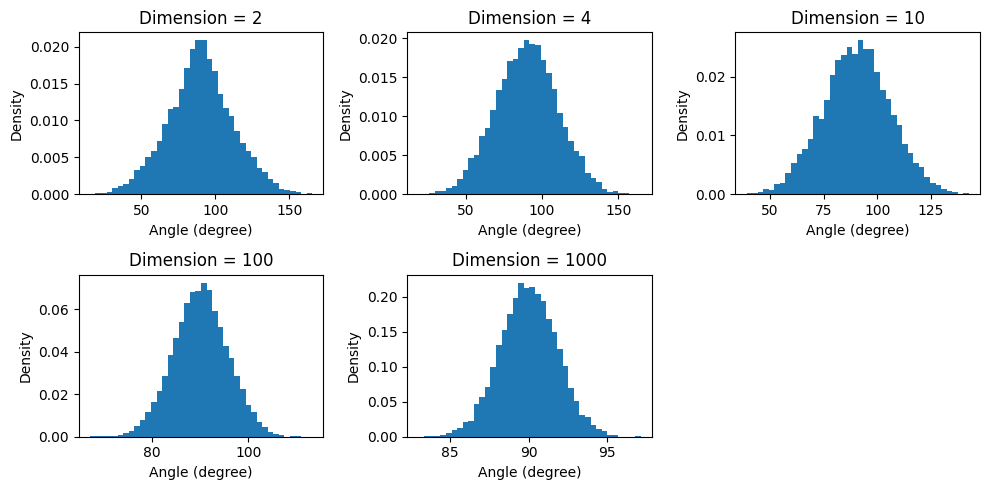

In [29]:
def angle_between(x, y):
    theta = np.arccos(np.dot(x, y))
    theta_deg = np.degrees(theta)
    return theta_deg


dims = [2, 4, 10, 100, 1000]
num_pairs = 10000

dimension_angles = {}
for dim in dims:
    angles = []
    for _ in range(num_pairs):
        x = create_point_unit_ball(dim)
        y = create_point_unit_ball(dim)
        theta = angle_between(x, y)
        angles.append(theta)
    dimension_angles[dim] = np.array(angles)


plt.figure(figsize=(10, 5))

for i, dim in enumerate(dims, 1):
    plt.subplot(2, 3, i)
    plt.hist(dimension_angles[dim], bins=40, density=True)
    plt.title(f"Dimension = {dim}")
    plt.xlabel("Angle (degree)")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

## d) Mean of Angles and Distances to Equator

In [28]:
dims = [2, 4, 10, 100, 1000]
n_points = 10_000

points = {}
for dim in dims:
    points[dim] = create_points_unit_ball(n_points, dim)

### Mean Distance To Equator

In [31]:
resluts1 = []

for dim in points.keys():
    points_per_dim = points[dim]
    distances = geodesic_distance_to_equator(points_per_dim)
    mean_distances = sum(distances) / len(distances)
    resluts1.append({'dimension': dim, 'point': n_points, 'Mean Distance To Equator': mean_distances})

resluts1 = pd.DataFrame(resluts1)
resluts1

,dimension,point,Mean Distance To Equator
0,2,10000,0.788421
1,4,10000,0.468399
2,10,10000,0.268386
3,100,10000,0.080486
4,1000,10000,0.025269


### Mean angles

In [32]:
results2 = []
for dim in points.keys():
    points_per_dim = points[dim]
    x_points = points_per_dim[:5000]
    y_points = points_per_dim[5000:]
    num_pairs = n_points // 2
    angles = []

    for i in range(num_pairs):
        x = x_points[i]
        y = y_points[i]
        theta = angle_between(x, y)
        angles.append(theta)
    mean_angles = sum(angles) / len(angles)
    results2.append({'dimension': dim, 'point': n_points, 'Mean angle': mean_angles})


results2 = pd.DataFrame(results2)
results2

,dimension,point,Mean angle
0,2,10000,89.857623
1,4,10000,89.876276
2,10,10000,90.249243
3,100,10000,89.962166
4,1000,10000,90.024498


# Question 2

## a) Generate points in d-dimension Cube

In [35]:
def generate_points_in_cube(dim: int, num_points: int):
    return np.random.uniform(-0.5, 0.5, size=(num_points, dim))


dims = [2, 3, 5, 10, 20]
n_points = 1000

points_in_cube = {}
for dim in dims:
    points_in_cube[dim] = generate_points_in_cube(dim=dim, num_points=n_points)

## b) Monte Carlo Estimation of d-Dimensional Sphere Volume

In [43]:
def mc_sphere_volume(dim: int, num_samples: int, radius: float):

    X = np.random.uniform(-radius, radius, size=(num_samples, dim))
    norms_sq = np.sum(X**2, axis=1)
    inside = (norms_sq <= radius*radius)
    k = inside.sum()

    frac = k / num_samples
    cube_vol = (2 * radius) ** d
    estimate = frac * cube_vol

    return estimate

result_2b = []
for dim in dims:
    volume = mc_sphere_volume(dim=dim, num_samples=n_points, radius=0.5)
    result_2b.append({'Dim': dim, 'Points': n_points, 'Volume of Sphere (MC)': volume})

result_2b = pd.DataFrame(result_2b)
result_2b

,Dim,Points,Volume of Sphere (MC)
0,2,1000,0.779
1,3,1000,0.500
2,5,1000,0.168
3,10,1000,0.002
4,20,1000,0.000
